# Modeling

26/05/2018

Modeling - build classification models

__Contents:__

1. Preparation
2. Building benchmark models
3. Model development
    * Logistic Regression
    * Random Forest
4. Hyperparameter Optimization

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

sns.set_style('white')
sns.set_context("poster")

dfo = pd.read_csv('./data/train-03-cfe.csv').set_index('PassengerId')
dfo.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Surname,Title,Fancy_title,U15_many_siblings,alone,is_male,Embarked_codes,is_master,is_mr,cat_age
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,0,3,male,22.0,1,0,7.2500,S,Braund,Mr,False,False,False,True,2,False,True,2
2,1,1,1,female,38.0,1,0,71.2833,C,Cumings,Mrs,False,False,False,False,0,False,False,3
3,2,1,3,female,26.0,0,0,7.9250,S,Heikkinen,Miss,False,False,True,False,2,False,False,2
4,3,1,1,female,35.0,1,0,53.1000,S,Futrelle,Mrs,False,False,False,False,2,False,False,3
5,4,0,3,male,35.0,0,0,8.0500,S,Allen,Mr,False,False,True,True,2,False,True,3


In [2]:
# drop repeated columns
cols = ['Unnamed: 0', 'Age', 'Sex', 'Embarked', 'Title', 'Surname']
df = dfo.drop(cols, axis=1)
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Fancy_title,U15_many_siblings,alone,is_male,Embarked_codes,is_master,is_mr,cat_age
PassengerId,,,,,,,,,,,,,
1,0,3,1,0,7.2500,False,False,False,True,2,False,True,2
2,1,1,1,0,71.2833,False,False,False,False,0,False,False,3
3,1,3,0,0,7.9250,False,False,True,False,2,False,False,2
4,1,1,1,0,53.1000,False,False,False,False,2,False,False,3
5,0,3,0,0,8.0500,False,False,True,True,2,False,True,3


## Benchmark Models

Build the following simple benchmark models so that we can assess the efficiency of more complex models:

1. All female will survive
2. All feamle OR age <= 5 will survive
3. All feamle OR age <= 15 will survive

In [3]:
# note: numpy vectorization is faster then pandas looping and vectorization
y_true = df.Survived.values
is_male = df.is_male.values
bench_female = (is_male == False).astype(int)
bench_female_score = accuracy_score(y_true, bench_female)
print('Benchmark Accuracy -- All female survived: {:.3f}'.format(bench_female_score))

Benchmark Accuracy -- All female survived: 0.787


In [4]:
ca_0 = (df.cat_age.values == 0).astype(int)
bench_female_ca0 = (bench_female | ca_0)
bench_female_ca0_score = accuracy_score(y_true, bench_female_ca0)
print('Benchmark Accuracy -- All female OR age <= 5 survived: {:.3f}'.format(bench_female_ca0_score))

Benchmark Accuracy -- All female OR age <= 5 survived: 0.795


In [5]:
ca_1 = (df.cat_age.values == 1).astype(int)
bench_female_ca01 = (bench_female_ca0 | ca_1)
bench_female_ca01_score = accuracy_score(y_true, bench_female_ca01)
print('Benchmark Accuracy -- All female OR age <= 15 survived: {:.3f}'.format(bench_female_ca01_score))

Benchmark Accuracy -- All female OR age <= 15 survived: 0.789


Accuracy to beat: 0.795

# Model Development

## Preparation

Split the data into training and test set

In [6]:
X = df.drop('Survived', axis=1).values
y = df['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Model: Logistic Regression

* Simple linear model
* Fast and efficient to compute
* Suitable for classifying targets with only two possibilities

In [7]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
scores = cross_val_score(clf_lr, X, y, cv=10)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.827 (+/- 0.060)


## Model: Decision Tree

* Able to capture non-linearity in the data

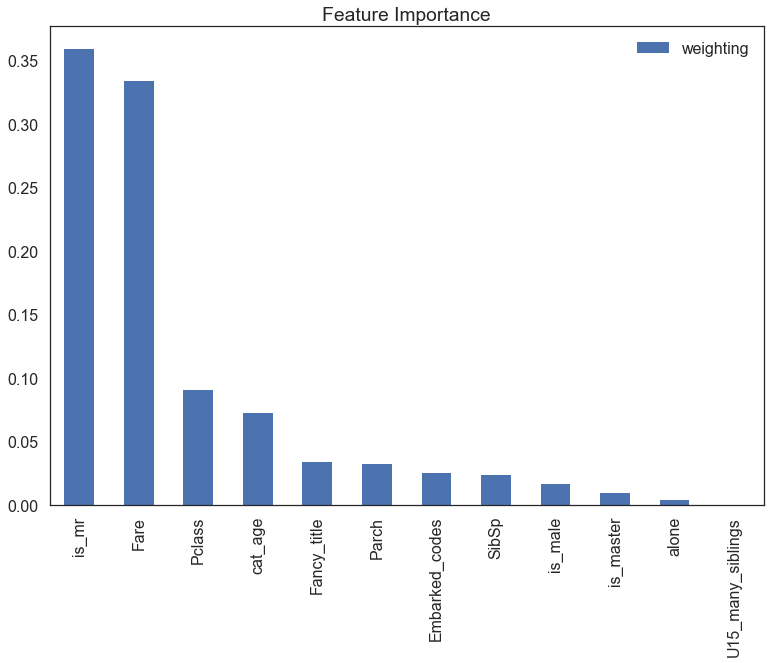

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf_df = DecisionTreeClassifier().fit(X, y)
features = np.array(df.drop('Survived', axis=1).columns)
importances = clf_df.feature_importances_

feature_importances = pd.DataFrame(importances, index=features, columns=['weighting'])
feature_importances = feature_importances.sort_values(by='weighting', ascending=False)

feature_importances.plot(kind='bar')
_ = plt.title('Feature Importance')

In [9]:
clf_dt = DecisionTreeClassifier()
scores = cross_val_score(clf_dt, X, y, cv=10)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.803 (+/- 0.082)


## Model: Random Forest

* Reduces overfitting in decision tree models

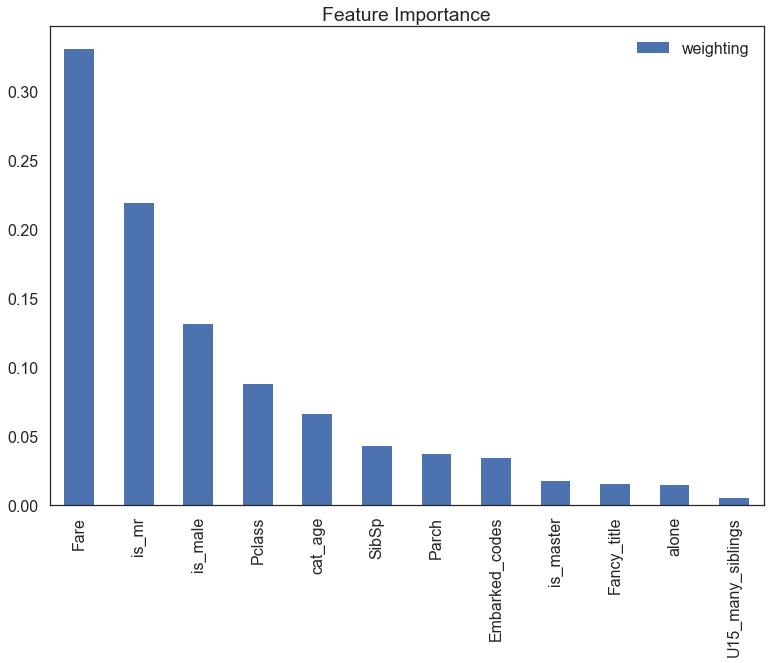

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier().fit(X, y)
features = np.array(df.drop('Survived', axis=1).columns)
importances = clf_rf.feature_importances_

feature_importances = pd.DataFrame(importances, index=features, columns=['weighting'])
feature_importances = feature_importances.sort_values(by='weighting', ascending=False)

feature_importances.plot(kind='bar')
_ = plt.title('Feature Importance')

In [11]:
clf_rf = RandomForestClassifier()
scores = cross_val_score(clf_rf, X, y, cv=10)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.808 (+/- 0.109)


### Hyperparameter Tuning

#### Tree Depth

In [12]:
depths = np.array([1, 2, 4, 8, 16, 32])
acc = []

for d in depths:
    clf_rf = RandomForestClassifier(max_depth=d)
    scores = cross_val_score(clf_rf, X, y, cv=3)
    print("max_depth: {} Accuracy: {:.3f} (+/- {:.2f})".format(d, scores.mean(), scores.std() * 2))
    acc.append(scores.mean())

max_depth: 1 Accuracy: 0.690 (+/- 0.10)
max_depth: 2 Accuracy: 0.798 (+/- 0.02)
max_depth: 4 Accuracy: 0.809 (+/- 0.04)
max_depth: 8 Accuracy: 0.814 (+/- 0.05)
max_depth: 16 Accuracy: 0.800 (+/- 0.03)
max_depth: 32 Accuracy: 0.818 (+/- 0.03)


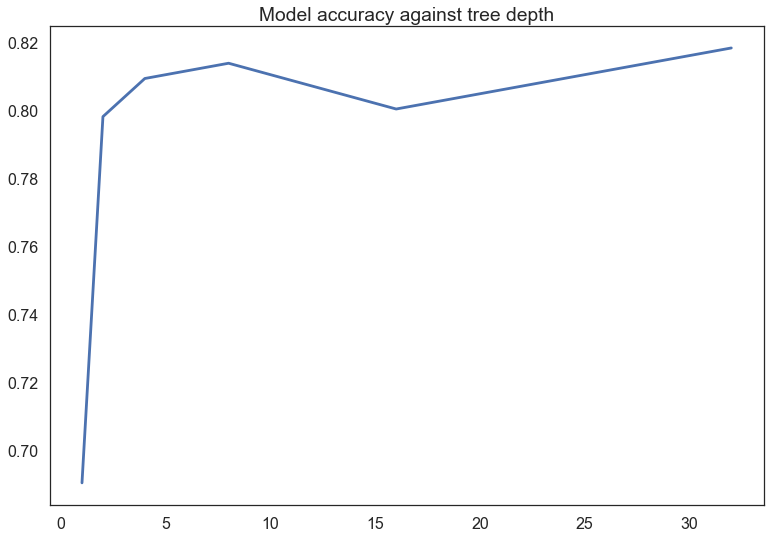

In [13]:
plt.plot(depths, acc)
_ = plt.title('Model accuracy against tree depth')

Figure above shows the underfitting and overfitting regions and can be used to identify the optimal parameter.

### Grid Search

Grid Search can be used to find the optimal parameters

In [14]:
parm = {'n_estimators':[2, 4, 8, 16, 32],
        'max_features':[2, 4, 8, len(features)],
        'max_depth':[2, 4, 8, 16, 32]}

clf_rf = RandomForestClassifier()
clf = GridSearchCV(clf_rf, parm, cv=5).fit(X_train, y_train)
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=12, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=16, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [15]:
# Best model accuracy
print('Best Score: {:.4f}'.format(clf.best_score_))

Best Score: 0.8263


In [16]:
# Best parameters
clf.best_params_

{'max_depth': 8, 'max_features': 12, 'n_estimators': 16}

In [17]:
# param = {'max_depth': 4, 'max_features': 4, 'n_estimators': 16}
clf_rf = RandomForestClassifier(max_depth=8, max_features=8, n_estimators=32)
scores = cross_val_score(clf_rf, X, y, cv=10)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.8350 (+/- 0.10)


## Conclusion

The final Random Forest model has higher accuracy score than the benchmark models, but the Logistic Regression model is simplier and might generalize better. There's so much can be done to further increase the accuracy of the model, for example:

* Reduce model complexity by using fewer features
* Bin the non-linear features - improve the fitting in linear models

Thanks for reading!